In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
y_hat = tf.constant(36, name='y_hat')        
y = tf.constant(39, name='y')                   

loss = tf.Variable((y - y_hat)**2, name='loss')

init = tf.global_variables_initializer()         
                                    
with tf.Session() as session:               
    session.run(init)                            
    print(session.run(loss))                    

Instructions for updating:
Colocations handled automatically by placer.
9


In [3]:
a = tf.constant(10)
b = tf.constant(25)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
#?c  
#Tensor type

In [5]:
sess = tf.Session()
print(sess.run(c))

250


In [6]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


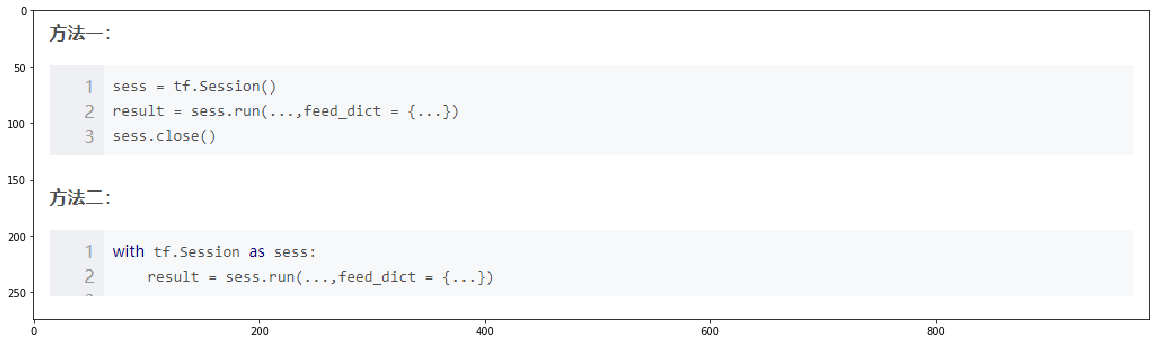

In [30]:
from PIL import Image
img=Image.open('images/tf创建session.png')
plt.figure(figsize=(20,20))
plt.imshow(img)    

In [7]:
#?x

In [8]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回：
        result - 运行了session后的结果，运行的是Y = WX + b 

    """

    np.random.seed(42) #指定随机种子

    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)

    Y = tf.add(tf.matmul(W,X),b) #tf.matmul是矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以以写成这样子

    #创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)
    sess.close()

    return result


In [9]:
print( "result = " + str(linear_function()))

result = [[ 0.07495019]
 [-0.63859577]
 [ 0.34617089]
 [-1.64050914]]


<h1>sigmoid</h1>

In [14]:
def sigmoid(z):
    x=tf.placeholder(tf.float32,name='x')
    sig=tf.sigmoid(x)
    
    with tf.Session() as ses:
        result=ses.run(sig,feed_dict={x:z})
        
    return result
    

In [16]:
print(sigmoid(1))
print(sigmoid(0))

0.7310586
0.5


<h1>Cost</h1>

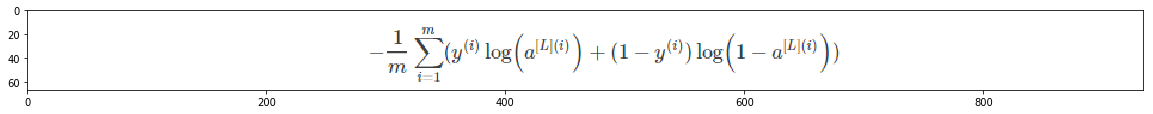

In [19]:
from PIL import Image
img=Image.open('images/逻辑回归L层损失函数.png')
plt.figure(figsize=(20,20))
plt.imshow(img)    

In [51]:
def cost(logits,labels):
    z=tf.placeholder(tf.float32,name='z')
    y=tf.placeholder(tf.float32,name='y')
    
    #核心函数。
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y) 
    
    sess=tf.Session()
    #返回值
    cost=sess.run(cost,feed_dict={z:logits,y:labels})
    sess.close()
    
    return cost
    


In [52]:

logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.8]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366408  0.41385433 0.40652382]


In [49]:
#del cost  删除cost 重新赋值。

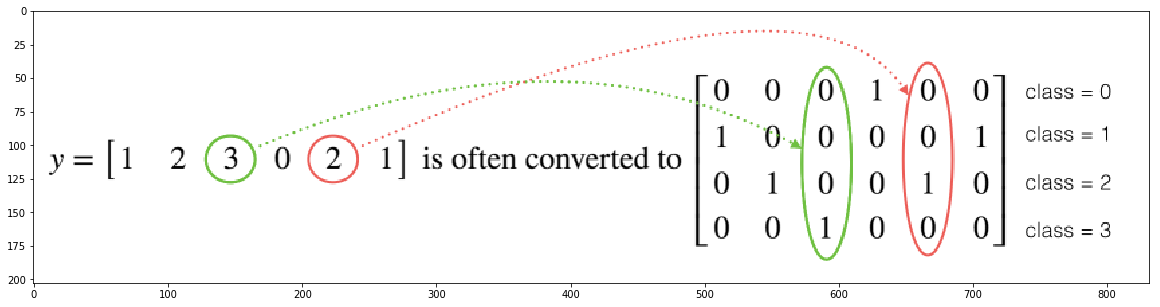

In [54]:
from PIL import Image
img=Image.open('images/one_hot.png')
plt.figure(figsize=(20,20))
plt.imshow(img)    

In [55]:
def one_hot_matrix(labels, C):
    C=tf.constant(C,name='C')
    
    one_hot_matrix=tf.one_hot(indices=labels,depth=C,axis=0)
    
    sess=tf.Session()
    
    one_hot=sess.run(one_hot_matrix)
    
    sess.close()
    
    return one_hot

In [61]:
labels = np.array([1,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


In [64]:
def ones(shape):
    ones=tf.ones(shape)
    
    sess=tf.Session()
    
    ones=sess.run(ones)
    
    sess.close()
    
    return ones

In [66]:
print ("ones = " + str(ones([9])))

ones = [1. 1. 1. 1. 1. 1. 1. 1. 1.]


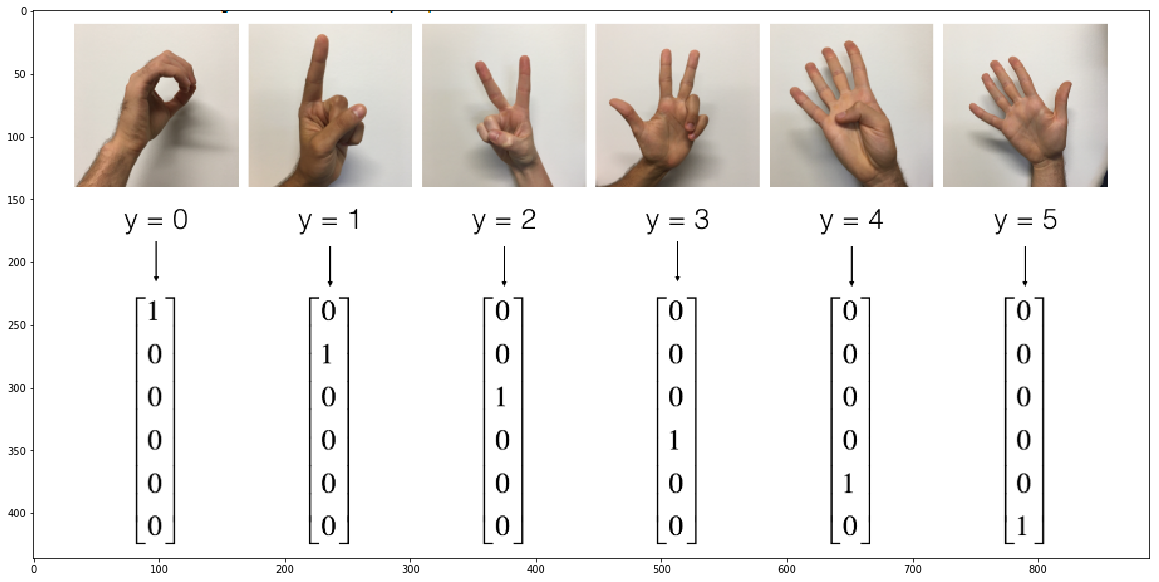

In [69]:
image=Image.open("images/signs.png")
plt.figure(figsize=(20,20))
plt.imshow(image)

In [70]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 0


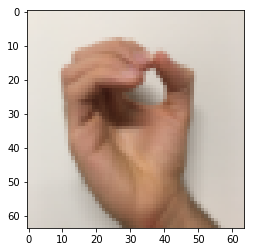

In [72]:
index = 1
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<h1>看一眼数据</h1>

In [78]:
print(X_train_orig.shape[0])
print(X_train_orig.shape)
print(Y_train_orig.shape)
print(X_test_orig.shape)
print(Y_test_orig.shape)

1080
(1080, 64, 64, 3)
(1, 1080)
(120, 64, 64, 3)
(1, 120)


In [76]:
classes

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [79]:
test1=X_train_orig.reshape(X_train_orig.shape[0], -1)

In [80]:
test1.shape

(1080, 12288)

In [81]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

##### 归一化
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.·

In [ ]:
#
# def convert_to_one_hot(Y, C):
#     Y = np.eye(C)[Y.reshape(-1)].T
#     return Y

In [83]:
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

<h1>处理后的数据</h1>

In [84]:
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


tf.placeholder(
    dtype,
    shape=None,
    name=None
)
<br></br>
dtype：数据类型。常用的是tf.float32,tf.float64等数值类型
<br></br>
shape：数据形状。默认是None，就是一维值，也可以是多维（比如[2,3], [None, 3]表示列是3，行不定）
<br></br>
name：名称


In [85]:
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y

In [86]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_21:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_10:0", shape=(6, ?), dtype=float32)


<h1>tf.contrib.layers.xavier_initializer   用于weights</h1>
<h1>tf.zeros_initializer   用于biases</h1>

In [90]:
def initialize_parameters():
    
    tf.set_random_seed(1)              
        

    W1 = tf.get_variable("W1", [25, 12288], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [91]:

tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


<h1>前向传播</h1>

In [119]:
def forward_propagation(X, parameters,print_log=False):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    #tf和np
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    if(print_log):
        print("Z1 shape"+str(Z1.shape))
    
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    if(print_log):
        print("A1 shape"+str(A1.shape))

    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    if(print_log):
        print("Z2 shape"+str(Z2.shape))
    
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    if(print_log):
        print("A2 shape"+str(A2.shape))
    
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    if(print_log):
        print("Z3 shape"+str(Z3.shape))
    
    return Z3

In [120]:
#用于清除默认图形堆栈并重置全局默认图形。 
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters,print_log=True)  #看看输出
    print("Z3 = " + str(Z3))

Z1 shape(25, ?)
A1 shape(25, ?)
Z2 shape(12, ?)
A2 shape(12, ?)
Z3 shape(6, ?)
Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [121]:
def compute_cost(Z3,Y):

    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))

    return cost

In [122]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


<h1>反向传播</h1>
<h3>optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)</h3>

In [125]:
def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
        print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init = tf.global_variables_initializer()

    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)

        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = random_mini_batches(X_train,Y_train,minibatch_size,seed)

            for minibatch in minibatches:

                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch

                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")

        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters

epoch = 0    epoch_cost = 1.8557019342075693
epoch = 100    epoch_cost = 1.0172552358020432
epoch = 200    epoch_cost = 0.7331836837710759
epoch = 300    epoch_cost = 0.5730706019835038
epoch = 400    epoch_cost = 0.46857342620690673
epoch = 500    epoch_cost = 0.38122750863884436
epoch = 600    epoch_cost = 0.3138188882307572
epoch = 700    epoch_cost = 0.2536998621442102
epoch = 800    epoch_cost = 0.20388920289097412
epoch = 900    epoch_cost = 0.1664544761632428
epoch = 1000    epoch_cost = 0.14662288197062232
epoch = 1100    epoch_cost = 0.10728875355738583
epoch = 1200    epoch_cost = 0.08653408757439167
epoch = 1300    epoch_cost = 0.059361102398146265
epoch = 1400    epoch_cost = 0.052228114765250334


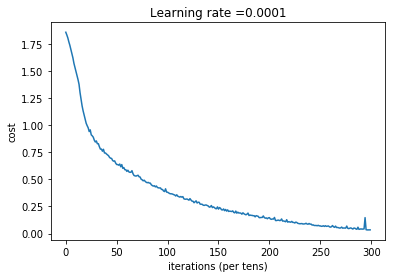

参数已经保存到session。
训练集的准确率： 0.9990741
测试集的准确率: 0.725


In [126]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [ ]:
#存储图片到h5py
# from scipy import misc
# X = misc.imresize(misc.imread('xx.jpg' % i), image_size)
# h = h5py.File&#40;'pic.h5'&#41;
# h.create_dataset("picture",data=X)

<h1>很有意思，自己的图片</h1>

D:\soft\conda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
D:\soft\conda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


Your algorithm predicts: y = 4


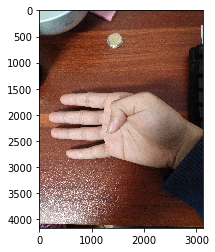

In [127]:
import scipy
from PIL import Image
from scipy import ndimage


my_image = "finger_4.jpg"



fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))